<a href="https://colab.research.google.com/github/Tatoloops/PublicRepository/blob/PyNotebook/Python/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

dataUpload = files.upload()

for fn in dataUpload.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(dataUpload[fn])))

Saving gdp_over_hours_worked.xlsx to gdp_over_hours_worked.xlsx
User uploaded file "gdp_over_hours_worked.xlsx" with length 2243786 bytes


In [4]:
import pandas as pd

dataFrame = pd.read_excel(next(iter(dataUpload.keys())))

In [5]:
def delete_column(dataframe, column_name):
    if column_name in dataframe.columns:
        dataframe = dataframe.drop(column_name, axis=1)
        print(f"Column '{column_name}' deleted successfully.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

    return dataframe

def delete_rows_with_na(dataframe, column_name):
    if column_name in dataframe.columns:
        dataframe = dataframe.dropna(subset=[column_name])
        print(f"Rows with NA in column '{column_name}' deleted successfully.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

    return dataframe


dataFrame = delete_column(dataFrame, 'iso2c')
dataFrame = delete_column(dataFrame, 'iso3c')
dataFrame = delete_column(dataFrame, 'working_age_pop_pct')
dataFrame = delete_column(dataFrame, 'employment_rate')
dataFrame = delete_column(dataFrame, 'hours_worked')
dataFrame = delete_column(dataFrame, 'total_hours')
dataFrame = delete_column(dataFrame, 'hours_per_employed')
dataFrame = delete_column(dataFrame, 'employed')
dataFrame = delete_column(dataFrame, 'total_hours_alternative')
dataFrame = delete_column(dataFrame, 'gdp_over_k_hours_worked')
dataFrame = delete_column(dataFrame, 'gdp_ppp_over_k_hours_worked')
dataFrame = delete_column(dataFrame, 'gdp_ppp_over_k_hours_worked_c')

dataFrame = delete_rows_with_na(dataFrame, 'pop')
dataFrame = delete_rows_with_na(dataFrame, 'labor_force')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp_c')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp')
dataFrame = delete_rows_with_na(dataFrame, 'gdp')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_c')
dataFrame = delete_rows_with_na(dataFrame, 'unemployment_r')
dataFrame = delete_rows_with_na(dataFrame, 'pop_over_65')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_over_pop')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp_over_pop')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp_over_labor_force')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_ppp_over_pop_c')
dataFrame = delete_rows_with_na(dataFrame, 'gdp_over_pop_c')


print("\nDataFrame después de eliminar filas y columnas incompletas:")
print(dataFrame)

Column 'iso2c' deleted successfully.
Column 'iso3c' deleted successfully.
Column 'working_age_pop_pct' deleted successfully.
Column 'employment_rate' deleted successfully.
Column 'hours_worked' deleted successfully.
Column 'total_hours' deleted successfully.
Column 'hours_per_employed' deleted successfully.
Column 'employed' deleted successfully.
Column 'total_hours_alternative' deleted successfully.
Column 'gdp_over_k_hours_worked' deleted successfully.
Column 'gdp_ppp_over_k_hours_worked' deleted successfully.
Column 'gdp_ppp_over_k_hours_worked_c' deleted successfully.
Rows with NA in column 'pop' deleted successfully.
Rows with NA in column 'labor_force' deleted successfully.
Rows with NA in column 'gdp_ppp_c' deleted successfully.
Rows with NA in column 'gdp_ppp' deleted successfully.
Rows with NA in column 'gdp' deleted successfully.
Rows with NA in column 'gdp_c' deleted successfully.
Rows with NA in column 'unemployment_r' deleted successfully.
Rows with NA in column 'pop_over_

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

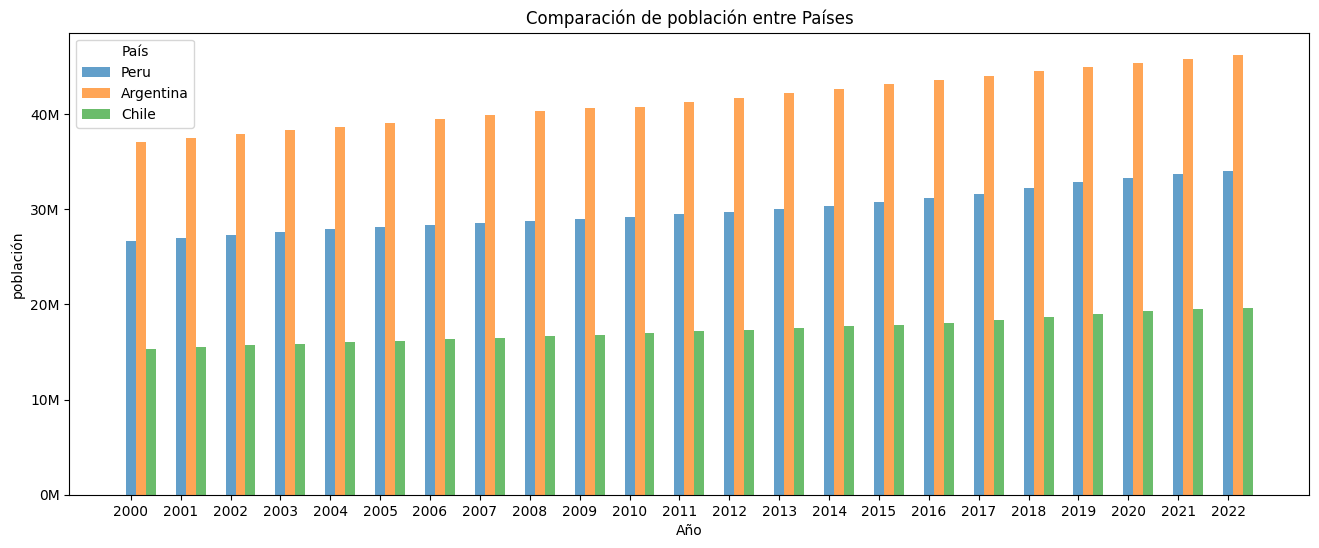

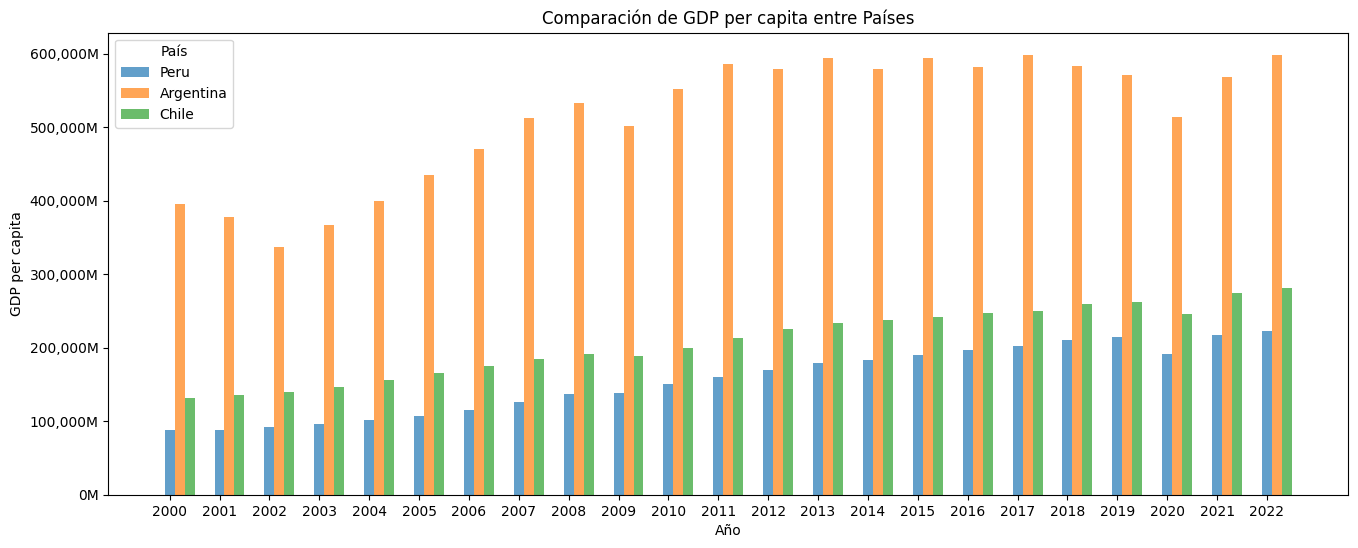

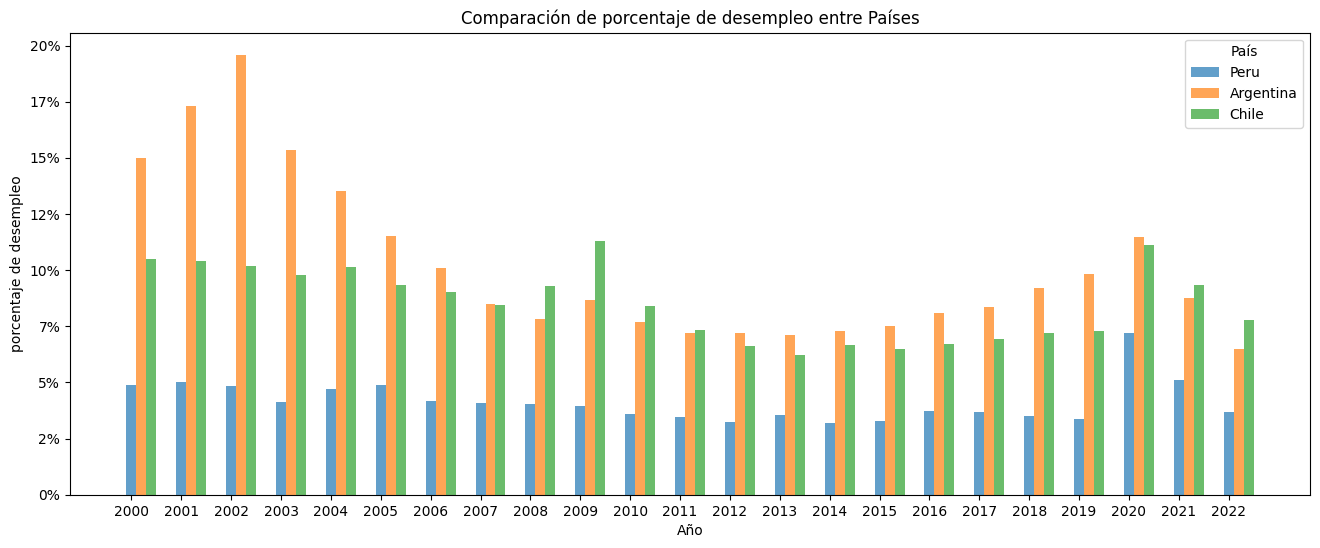

In [22]:
def plot_population_comparison(data, year_start, year_end, country_list, column_to_compare):

    # Filtrar el DataFrame según el rango de años y la lista de países
    filtered_data = data[(data['year'] >= year_start) & (data['year'] <= year_end) & (data['country'].isin(country_list))]

    # Crear el gráfico de barras
    fig, ax = plt.subplots(figsize=(16, 6))

    # Barra para cada país en cada año
    for i, country in enumerate(country_list):
        subset_data = filtered_data[filtered_data['country'] == country]
        ax.bar(subset_data['year'] + 0.2 * i, subset_data[column_to_compare], width=0.2, label=country, alpha=0.7)

    # Configurar etiquetas en el eje X
    ax.set_xticks(np.arange(year_start, year_end + 1))
    ax.set_xticklabels(np.arange(year_start, year_end + 1))

    if    column_to_compare == "pop":
      columnName="población" ;
      ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))
    elif  column_to_compare == "gdp_c":
      columnName="GDP per capita"
      ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6):,}M'))
    elif  column_to_compare == "unemployment_r":
      columnName="porcentaje de desempleo"
      ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}%'))

    # Configurar etiquetas y leyenda
    ax.set_xlabel('Año')
    ax.set_ylabel(f'{columnName}')
    ax.set_title(f'Comparación de {columnName} entre Países')
    ax.legend(title='País')

    # Formatear el eje Y para mostrar valores en millones


    # Mostrar el gráfico
    plt.show()

plot_population_comparison(dataFrame, 2000, 2022, ['Peru', 'Argentina','Chile'], 'pop')
plot_population_comparison(dataFrame, 2000, 2022, ['Peru', 'Argentina','Chile'], 'gdp_c')
plot_population_comparison(dataFrame, 2000, 2022, ['Peru', 'Argentina','Chile'], 'unemployment_r')